# Projeto de precificação do valor cobrado para entrega de esculturas

![](https://github.com/Mirlaa/regressao-arvores/blob/main/imagens-projeto/imagem-do-projeto-inicio.png?raw=true)

# Aula 1 - Trabalhando com os dados

In [1]:
url = 'https://raw.githubusercontent.com/Mirlaa/regressao-arvores/main/dados_curso/entregas.csv'

caminho_teste = 'https://raw.githubusercontent.com/Mirlaa/regressao-arvores/main/dados_curso/teste_entregas.csv'


In [2]:
import pandas as pd
import numpy as np

In [3]:
dados = pd.read_csv(url)
dados.head()

,id_cliente,nome_artista,reputacao_artista,altura,largura,peso,material,preco_escultura,preco_base_envio,internacional,envio_expresso,instalacao_incluida,transporte,fragil,pedido_extra_cliente,localizacao_remota,data_agendada,data_entrega,custo
0,e9dff114-bc2b-47e9-9f5c-669e32ad9bbe,Billy Jenkins,0.26,5.1816,1.8288,1872.427776,Latão,73027.5,85.4175,Sim,Sim,Não,Aéreo,Não,Sim,Não,07/06/19,03/06/19,1487.2725
1,ba3b707f-b123-4eec-93f4-1fbebfe72b68,Jean Bryant,0.28,0.9144,0.9144,27.669112,Latão,35857.5,78.7500,Não,Não,Não,Rodoviário,Não,Sim,Não,06/03/21,05/03/21,839.7900
2,c4212086-3e22-489e-bc2e-0d5092ef0526,Laura Miller,0.07,2.4384,1.5240,107.501304,Argila,26040.0,111.1950,Não,Não,Não,Rodoviário,Sim,Sim,Sim,09/03/19,08/03/19,810.0225
3,fec1bee9-44cf-498f-a849-5e5e2cab062b,Robert Chaires,0.12,2.7432,2.4384,1407.042384,Alumínio,30502.5,85.6275,Não,Não,Não,Não especificado,Não,Não,Sim,24/05/19,20/05/19,846.0900
4,f9f2ed8c-7f56-4e69-a80e-cb01d0a711da,Rosalyn Krol,0.15,5.1816,1.8288,146.963808,Alumínio,16695.0,62.6850,Sim,Sim,Sim,Aéreo,Não,Sim,Não,18/12/20,14/12/20,835.9575


Dicionário de dados:

| Nome da Coluna       | Descrição                                                      |
|----------------------|----------------------------------------------------------------|
| id_cliente        | Representa o número de identificação único dos clientes        |
| nome_artista      | Representa o nome do artista                                   |
| reputacao_artista | Representa a reputação de um artista no mercado (quanto maior o valor da reputação, maior a reputação do artista no mercado) |
| altura               | Representa a altura da escultura em metros                     |
| largura              | Representa a largura da escultura em metros                     |
| peso                 | Representa o peso da escultura em quilos                       |
| material             | Representa o material do qual a escultura é feita              |
| preco_escultura   | Representa o preço da escultura         |
| preco_base_envio  | Representa o preço base para o envio de uma escultura          |
| internacional        | Indica se o envio é internacional                              |
| envio_expresso       | Indica se o envio foi no modo expresso (rápido)    |
| instalacao_incluida  | Indica se a instalação estava incluída na compra da escultura  |
| transporte           | Representa o modo de transporte do pedido                      |
| fragil               | Indica se o pedido é frágil                                    |
| pedido_extra_cliente | Representa se o cliente deixou detalhes a mais para entrega     |
| data_agendada        | Representa a data de previsão de entrega        |
| data_entrega      | Representa a data de entrega do pedido          |
| custo                | Representa o custo do envio do pedido      |

In [4]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4462 entries, 0 to 4461
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id_cliente            4462 non-null   object 
 1   nome_artista          4462 non-null   object 
 2   reputacao_artista     4462 non-null   float64
 3   altura                4462 non-null   float64
 4   largura               4462 non-null   float64
 5   peso                  4462 non-null   float64
 6   material              4462 non-null   object 
 7   preco_escultura       4462 non-null   float64
 8   preco_base_envio      4462 non-null   float64
 9   internacional         4462 non-null   object 
 10  envio_expresso        4462 non-null   object 
 11  instalacao_incluida   4462 non-null   object 
 12  transporte            4462 non-null   object 
 13  fragil                4462 non-null   object 
 14  pedido_extra_cliente  4462 non-null   object 
 15  localizacao_remota   

**ENTENDENDO AS COLUNAS**

**Dado numérico:**
- `'reputacao_artista'`, `'altura'`, `'largura'`, `'peso'`, `'preco_escultura'`, `'preco_base_envio'`.

**Categóricas:**

- `'id_cliente'`, `'nome_artista'`, `'material'`, `'internacional'`, `'envio_expresso'`, `'instalacao_incluida'`, `'transporte'`, `'fragil'`, `'pedido_extra_cliente'`, `localizacao_remota`.

**Datas:**

- `'data_agendada'`, `'data_entrega'`.

**Alvo:**
- `'custo'`.

In [5]:
df = dados.copy()

In [6]:
df['data_agendada'] = pd.to_datetime(df['data_agendada'], format = '%d/%m/%y')
df['data_entrega'] = pd.to_datetime(df['data_entrega'], format = '%d/%m/%y')

In [7]:
df['diferenca_dias_entrega'] = (df['data_entrega'] - df['data_agendada']).dt.days

In [8]:
df['data_agendada_dias'] = df['data_agendada'].dt.day
df['data_agendada_mes'] = df['data_agendada'].dt.month
df['data_agendada_ano'] = df['data_agendada'].dt.year

In [9]:
df['data_entrega_dias'] = df['data_entrega'].dt.day
df['data_entrega_mes'] = df['data_entrega'].dt.month
df['data_entrega_ano'] = df['data_entrega'].dt.year

In [10]:
df.drop(['data_agendada', 'data_entrega'], axis=1, inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4462 entries, 0 to 4461
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id_cliente              4462 non-null   object 
 1   nome_artista            4462 non-null   object 
 2   reputacao_artista       4462 non-null   float64
 3   altura                  4462 non-null   float64
 4   largura                 4462 non-null   float64
 5   peso                    4462 non-null   float64
 6   material                4462 non-null   object 
 7   preco_escultura         4462 non-null   float64
 8   preco_base_envio        4462 non-null   float64
 9   internacional           4462 non-null   object 
 10  envio_expresso          4462 non-null   object 
 11  instalacao_incluida     4462 non-null   object 
 12  transporte              4462 non-null   object 
 13  fragil                  4462 non-null   object 
 14  pedido_extra_cliente    4462 non-null   

In [12]:
colunas_categoricas = ['id_cliente', 'nome_artista', 'material', 'internacional', 'envio_expresso', 'instalacao_incluida',
                       'transporte', 'fragil', 'pedido_extra_cliente','localizacao_remota']

for column in colunas_categoricas:
    unique_values = df[column].unique()
    print(f"Valores únicos na coluna '{column}' \n {len(unique_values)} valores:")
    print(unique_values)
    print('=='*45)

Valores únicos na coluna 'id_cliente' 
 4462 valores:
['e9dff114-bc2b-47e9-9f5c-669e32ad9bbe'
 'ba3b707f-b123-4eec-93f4-1fbebfe72b68'
 'c4212086-3e22-489e-bc2e-0d5092ef0526' ...
 'e1004685-9047-4f34-9103-57d900716936'
 'a380ff88-2c96-4d70-919a-af0bc8caeed7'
 '26fea648-9cc1-4a2b-9458-0b2d35957803']
Valores únicos na coluna 'nome_artista' 
 4441 valores:
['Billy Jenkins' 'Jean Bryant' 'Laura Miller' ... 'William Curry'
 'Karen Bayles' 'Denise Worth']
Valores únicos na coluna 'material' 
 8 valores:
['Latão' 'Argila' 'Alumínio' 'Madeira' 'Bronze' 'Pedra' 'Não especificado'
 'Mármore']
Valores únicos na coluna 'internacional' 
 2 valores:
['Sim' 'Não']
Valores únicos na coluna 'envio_expresso' 
 2 valores:
['Sim' 'Não']
Valores únicos na coluna 'instalacao_incluida' 
 2 valores:
['Não' 'Sim']
Valores únicos na coluna 'transporte' 
 4 valores:
['Aéreo' 'Rodoviário' 'Não especificado' 'Aquaviário']
Valores únicos na coluna 'fragil' 
 2 valores:
['Não' 'Sim']
Valores únicos na coluna 'pedido_

**ENTENDENDO AS COLUNAS TEXTUAIS**

**Categóricas:**

- *Valores binários*: `'internacional'`, `'envio_expresso'`, `'instalacao_incluida'`,  `'fragil'`, `'pedido_extra_cliente'`, `'localizacao_remota'`.
- *Várias Categorias*:`'material'`, `'transporte'`
- *Valores únicos*: `'id_cliente'`, `'nome_artista'`

In [13]:
categoricas = ['material', 'internacional', 'envio_expresso', 'instalacao_incluida',
                'transporte', 'fragil', 'pedido_extra_cliente','localizacao_remota']

#prefix = aplica o nome nas colunas que serão criadas
#drop_first = deleta as colunas de texto antigas
df = pd.get_dummies(df, columns=categoricas,
                    prefix = categoricas,
                    drop_first=True)

In [14]:
df.drop(['id_cliente', 'nome_artista'], axis=1, inplace=True)

In [15]:
df.head()

,reputacao_artista,altura,largura,peso,preco_escultura,preco_base_envio,custo,diferenca_dias_entrega,data_agendada_dias,data_agendada_mes,...,material_Pedra,internacional_Sim,envio_expresso_Sim,instalacao_incluida_Sim,transporte_Aéreo,transporte_Não especificado,transporte_Rodoviário,fragil_Sim,pedido_extra_cliente_Sim,localizacao_remota_Sim
0,0.26,5.1816,1.8288,1872.427776,73027.5,85.4175,1487.2725,-4,7,6,...,False,True,True,False,True,False,False,False,True,False
1,0.28,0.9144,0.9144,27.669112,35857.5,78.7500,839.7900,-1,6,3,...,False,False,False,False,False,False,True,False,True,False
2,0.07,2.4384,1.5240,107.501304,26040.0,111.1950,810.0225,-1,9,3,...,False,False,False,False,False,False,True,True,True,True
3,0.12,2.7432,2.4384,1407.042384,30502.5,85.6275,846.0900,-4,24,5,...,False,False,False,False,False,True,False,False,False,True
4,0.15,5.1816,1.8288,146.963808,16695.0,62.6850,835.9575,-4,18,12,...,False,True,True,True,True,False,False,False,True,False


In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

([<matplotlib.axis.XTick at 0x77e9a34bf8b0>,
 [Text(0, 0, '0'),
  Text(1000, 0, '1000'),
  Text(2000, 0, '2000'),
  Text(3000, 0, '3000'),
  Text(4000, 0, '4000'),
  Text(5000, 0, '5000'),
  Text(6000, 0, '6000'),
  Text(7000, 0, '7000'),
  Text(8000, 0, '8000'),
  Text(9000, 0, '9000'),
  Text(10000, 0, '10000'),
  Text(11000, 0, '11000'),
  Text(12000, 0, '12000'),
  Text(13000, 0, '13000'),
  Text(14000, 0, '14000'),
  Text(15000, 0, '15000'),
  Text(16000, 0, '16000'),
  Text(17000, 0, '17000'),
  Text(18000, 0, '18000'),
  Text(19000, 0, '19000'),
  Text(20000, 0, '20000'),
  Text(21000, 0, '21000'),
  Text(22000, 0, '22000'),
  Text(23000, 0, '23000'),
  Text(24000, 0, '24000'),
  Text(25000, 0, '25000')])

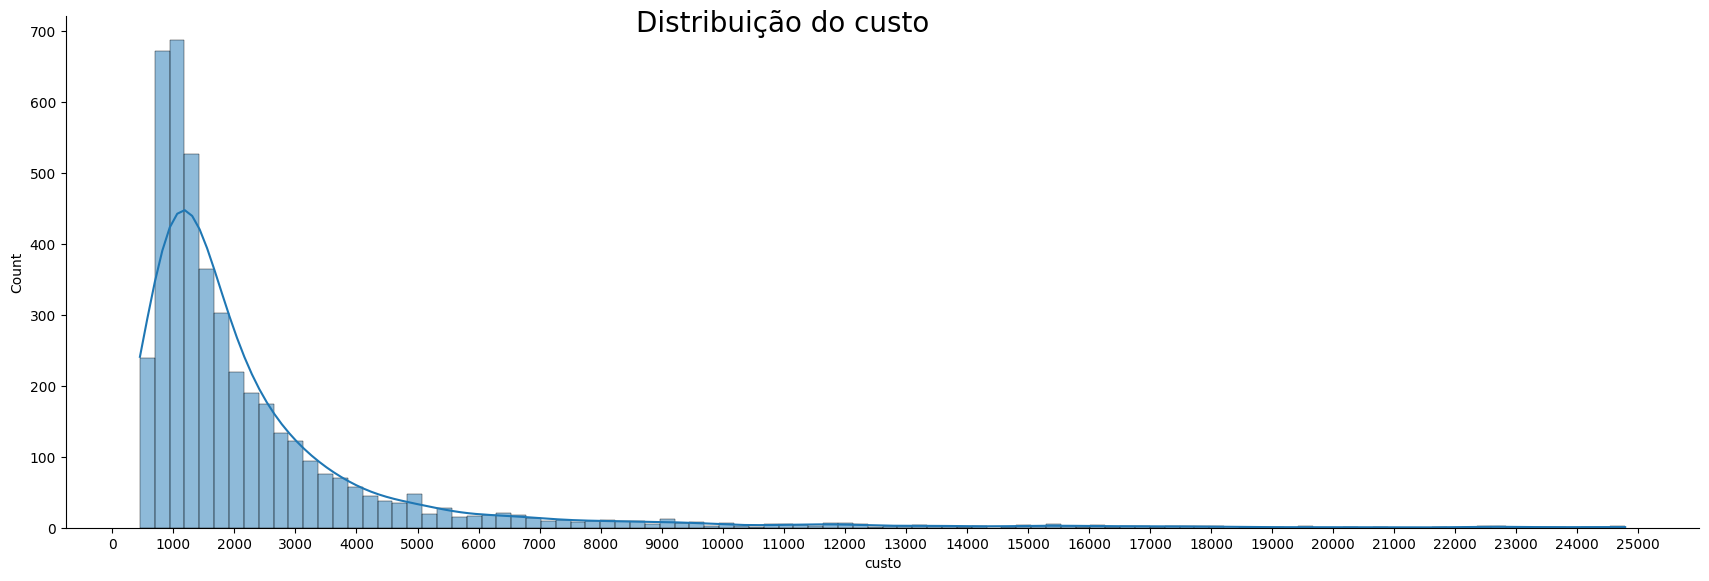

In [17]:
ax = sns.displot(data=df, x=df['custo'], kde=True, bins=100)
ax.figure.set_size_inches(20, 6)
ax.fig.suptitle('Distribuição do custo', fontsize=20)
plt.xticks(np.arange(0, 26000, 1000))

Text(0.5, 0.98, 'Relação entre o peso da escultura e o custo de envio')

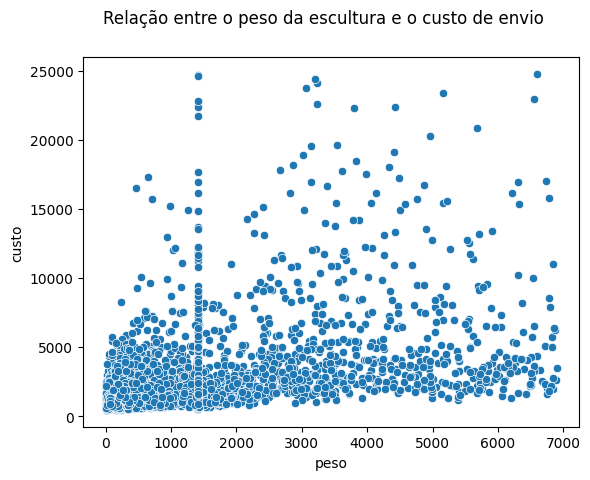

In [18]:
ax = sns.scatterplot(data=df, x=df['peso'], y=df['custo'])
ax.figure.suptitle('Relação entre o peso da escultura e o custo de envio')

Text(0.5, 0.98, 'Relação entre a reputação do artista e o custo de envio')

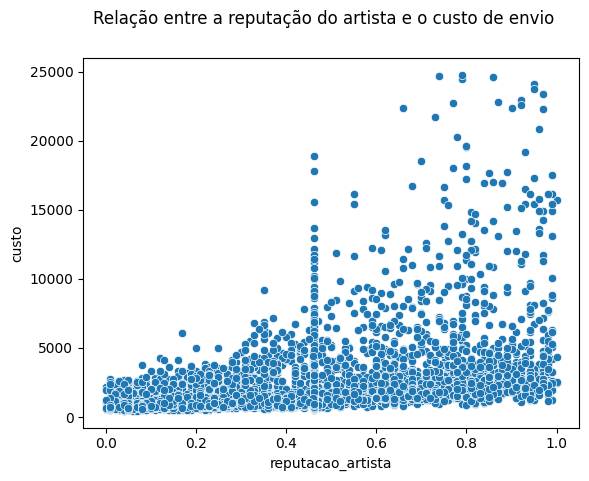

In [19]:
ax = sns.scatterplot(data=df, x=df['reputacao_artista'], y=df['custo'])
ax.figure.suptitle('Relação entre a reputação do artista e o custo de envio')

# Aula 2 - Construindo Árvore de Regressão

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X = df.drop('custo', axis=1)
y = df['custo']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)

In [23]:
len(X_test), len(X_train)

(893, 3569)

In [24]:
from sklearn.tree import DecisionTreeRegressor

In [25]:
dtr = DecisionTreeRegressor(random_state=45)
dtr.fit(X_train, y_train)

DecisionTreeRegressor(random_state=45)

In [26]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print('Métricas conjunto de treino:')
print('R²:', r2_score(y_train, dtr.predict(X_train)))
print('MAE:', mean_absolute_error(y_train, dtr.predict(X_train)))
print('RMSE:', mean_squared_error(y_train, dtr.predict(X_train), squared = False))

print('\n\nMétricas conjunto de teste:')
print('R²:', r2_score(y_test, dtr.predict(X_test)))
print('MAE:', mean_absolute_error(y_test, dtr.predict(X_test)))
print('RMSE:', mean_squared_error(y_test, dtr.predict(X_test), squared = False))

Métricas conjunto de treino:
R²: 1.0
MAE: 0.0
RMSE: 0.0


Métricas conjunto de teste:
R²: 0.6768224276483932
MAE: 682.6879535274356
RMSE: 1507.2656329983245


/home/arthur-pulini/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/arthur-pulini/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [27]:
print(f"Número de nós: {dtr.tree_.node_count}")
print(f"Número de folhas: {dtr.tree_.n_leaves}")
print(f"Profundidade máxima: {dtr.tree_.max_depth}")

Número de nós: 7135
Número de folhas: 3568
Profundidade máxima: 30


In [28]:
dtr.feature_names_in_

array(['reputacao_artista', 'altura', 'largura', 'peso',
       'preco_escultura', 'preco_base_envio', 'diferenca_dias_entrega',
       'data_agendada_dias', 'data_agendada_mes', 'data_agendada_ano',
       'data_entrega_dias', 'data_entrega_mes', 'data_entrega_ano',
       'material_Argila', 'material_Bronze', 'material_Latão',
       'material_Madeira', 'material_Mármore',
       'material_Não especificado', 'material_Pedra', 'internacional_Sim',
       'envio_expresso_Sim', 'instalacao_incluida_Sim',
       'transporte_Aéreo', 'transporte_Não especificado',
       'transporte_Rodoviário', 'fragil_Sim', 'pedido_extra_cliente_Sim',
       'localizacao_remota_Sim'], dtype=object)

In [29]:
dtr.feature_importances_

array([2.95041770e-01, 4.31193079e-02, 3.69397723e-02, 2.60943830e-02,
       3.85409075e-01, 1.48656853e-01, 1.17369100e-02, 1.07412375e-02,
       3.03126515e-03, 2.58205905e-03, 1.13139912e-02, 3.24455816e-03,
       1.22249763e-03, 6.54720930e-04, 2.86625309e-04, 9.10796028e-04,
       1.00064336e-04, 5.15460725e-04, 6.42873761e-04, 1.01696465e-05,
       7.37647663e-04, 5.81426736e-03, 2.24288656e-03, 2.12401453e-03,
       4.22502136e-04, 3.54267795e-04, 4.12407522e-03, 1.11812842e-03,
       8.07819173e-04])

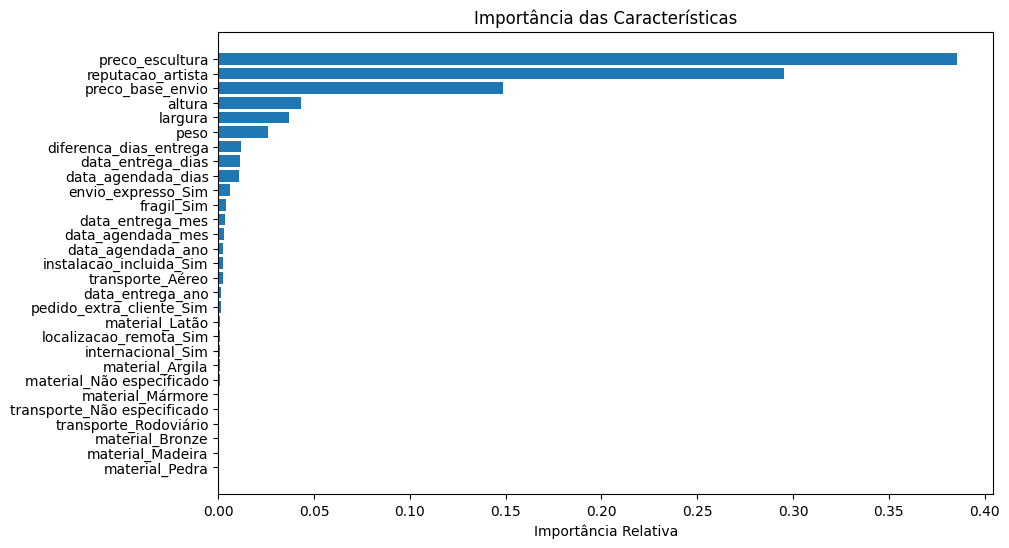

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

features_importancias = pd.DataFrame({'Feature': dtr.feature_names_in_,
                                      'Importância': dtr.feature_importances_}).sort_values(by='Importância', ascending=True)

plt.figure(figsize=(10, 6))
bars = plt.barh(features_importancias['Feature'], features_importancias['Importância'])
plt.xlabel('Importância Relativa')
plt.title('Importância das Características')

plt.show()

In [31]:
dtr.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': 45,
 'splitter': 'best'}

In [32]:
from sklearn.tree import plot_tree

[Text(0.8462189406840718, 0.9838709677419355, 'preco_escultura <= 157841.25\nsquared_error = 7448398.109\nsamples = 3569\nvalue = 2413.831'),
 Text(0.7252120428818807, 0.9516129032258065, 'preco_base_envio <= 150.57\nsquared_error = 3298711.856\nsamples = 3301\nvalue = 1982.553'),
 Text(0.5609183841632931, 0.9193548387096774, 'reputacao_artista <= 0.675\nsquared_error = 1773768.215\nsamples = 2898\nvalue = 1679.743'),
 Text(0.36759328278440323, 0.8870967741935484, 'reputacao_artista <= 0.445\nsquared_error = 553873.88\nsamples = 2259\nvalue = 1307.742'),
 Text(0.1939707840868259, 0.8548387096774194, 'reputacao_artista <= 0.245\nsquared_error = 95907.119\nsamples = 1273\nvalue = 1014.192'),
 Text(0.09977544777180222, 0.8225806451612904, 'peso <= 511.198\nsquared_error = 48140.904\nsamples = 656\nvalue = 881.594'),
 Text(0.04930585992718772, 0.7903225806451613, 'preco_base_envio <= 85.549\nsquared_error = 30907.319\nsamples = 399\nvalue = 804.642'),
 Text(0.023151411231411942, 0.75806451

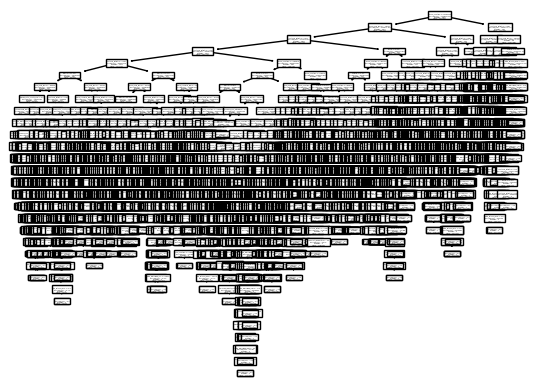

In [33]:
plot_tree(decision_tree=dtr, feature_names=dtr.feature_names_in_)

# Aula 3 - Evitando o overfitting com a otimização

![](https://github.com/Mirlaa/regressao-arvores/blob/main/imagens-projeto/imagem--2.png?raw=true)

In [34]:
param_grid = {
    'max_depth': [6, 8, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [5, 10, 15],
    'max_leaf_nodes': [None, 100, 500]
}

In [35]:
from sklearn.model_selection import GridSearchCV

In [36]:
grid_search_dtr = GridSearchCV(dtr, param_grid, scoring='neg_root_mean_squared_error', cv=5, n_jobs=-1)
grid_search_dtr.fit(X_train, y_train)

dtr_otimizado = grid_search_dtr.best_estimator_

print('Melhores parametros: ', grid_search_dtr.best_params_)

Melhores parametros:  {'max_depth': 10, 'max_leaf_nodes': None, 'min_samples_leaf': 10, 'min_samples_split': 2}


In [37]:
print('Métricas conjunto de treino:')
print('R²:', r2_score(y_train, dtr_otimizado.predict(X_train)))
print('MAE:', mean_absolute_error(y_train, dtr_otimizado.predict(X_train)))
print('RMSE:', mean_squared_error(y_train, dtr_otimizado.predict(X_train), squared = False))

print('\n\nMétricas conjunto de teste:')
print('R²:', r2_score(y_test, dtr_otimizado.predict(X_test)))
print('MAE:', mean_absolute_error(y_test, dtr_otimizado.predict(X_test)))
print('RMSE:', mean_squared_error(y_test, dtr_otimizado.predict(X_test), squared = False))

Métricas conjunto de treino:
R²: 0.8709496124958277
MAE: 473.7084817751579
RMSE: 980.4175958553703


Métricas conjunto de teste:
R²: 0.7539395249935403
MAE: 586.8626071994394
RMSE: 1315.194908266438


/home/arthur-pulini/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/arthur-pulini/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


**VAMOS COMPARAR**

![](https://github.com/Mirlaa/regressao-arvores/blob/main/imagens-projeto/imagem-3.png?raw=true)

In [38]:
from sklearn.model_selection import cross_validate, KFold

In [39]:
cv_estrategia = KFold(n_splits=3, shuffle=True, random_state=45)

resultados = cross_validate(dtr_otimizado, X, y, scoring='neg_mean_squared_error', cv=cv_estrategia,
                            return_train_score=True)

In [40]:
treino_rmse = np.sqrt(-resultados['train_score'])
teste_rmse = np.sqrt(-resultados['test_score'])

print("Treino RMSE em cada fold:", treino_rmse)
print("Teste RMSE em cada fold:", teste_rmse)
print("\nMédia do RMSE no treino:", treino_rmse.mean())
print("Média do RMSE no teste:", teste_rmse.mean())

Treino RMSE em cada fold: [1061.33787095  985.34242721 1023.82861998]
Teste RMSE em cada fold: [1359.22520081 1469.19123426 1424.79371964]

Média do RMSE no treino: 1023.5029727125925
Média do RMSE no teste: 1417.7367182339888


# Aula 4 - Implementando uma Floresta Aleatória

In [42]:
from sklearn.ensemble import RandomForestRegressor

In [44]:
rfr = RandomForestRegressor(n_estimators=100, random_state=45, oob_score=True)
rfr.fit(X_train, y_train)

RandomForestRegressor(oob_score=True, random_state=45)

In [45]:
print('Métricas conjunto de treino:')
print('R²:', r2_score(y_train, rfr.predict(X_train)))
print('MAE:', mean_absolute_error(y_train, rfr.predict(X_train)))
print('RMSE:', mean_squared_error(y_train, rfr.predict(X_train), squared = False))

print('\n\nMétricas conjunto de teste:')
print('R²:', r2_score(y_test, rfr.predict(X_test)))
print('MAE:', mean_absolute_error(y_test, rfr.predict(X_test)))
print('RMSE:', mean_squared_error(y_test, rfr.predict(X_test), squared = False))

print('\n\nPrevisão OOB R²: ', rfr.oob_score_)

Métricas conjunto de treino:
R²: 0.9773758519600008
MAE: 183.9172127206501
RMSE: 410.5041552539995


Métricas conjunto de teste:
R²: 0.8224788880212647
MAE: 463.52012368421055
RMSE: 1117.1055117958163


Previsão OOB R²:  0.8284340726706725


/home/arthur-pulini/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/arthur-pulini/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


**VAMOS COMPARAR**

![](https://github.com/Mirlaa/regressao-arvores/blob/main/imagens-projeto/imagem-4.png?raw=true)

# Aula 5 - Buscando a otimização da Floresta Aleatória

**VAMOS COMPARAR**

![](https://github.com/Mirlaa/regressao-arvores/blob/main/imagens-projeto/imagem-5.png?raw=true)

In [41]:
cv_estrategia = KFold(n_splits=3, shuffle=True, random_state=45)

resultados = cross_validate(rfr_otimizado,X,y,scoring='neg_mean_squared_error', cv= cv_estrategia,
                            return_train_score=True)

treino_rmse = np.sqrt(-resultados['train_score'])
teste_rmse = np.sqrt(-resultados['test_score'])

print("Média do RMSE no treino:", treino_rmse.mean())
print("Média do RMSE no teste:", teste_rmse.mean())

NameError: name 'rfr_otimizado' is not defined